# Analysing and Visualising the impact of Recession on Automobile sales using Matplotlib, Seaborn and Folium

# Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.

## Install required libraries

In [130]:
%pip install -q pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn
%pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

Creating plots for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization contain *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, i aim to gain insights into how recessions impacted automobile sales for a company.

# Importing Data


In [46]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(filepath, header=0)

In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [47]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

### Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


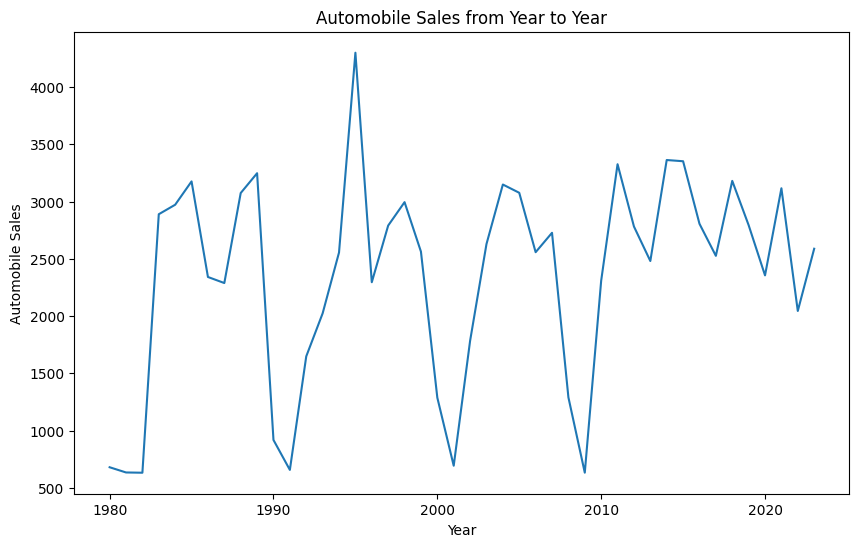

In [48]:
df_line =df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales from Year to Year')
plt.show()

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for years of recession
<br>Title as Automobile Sales during Recession
<br> 


In [18]:
print(df.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


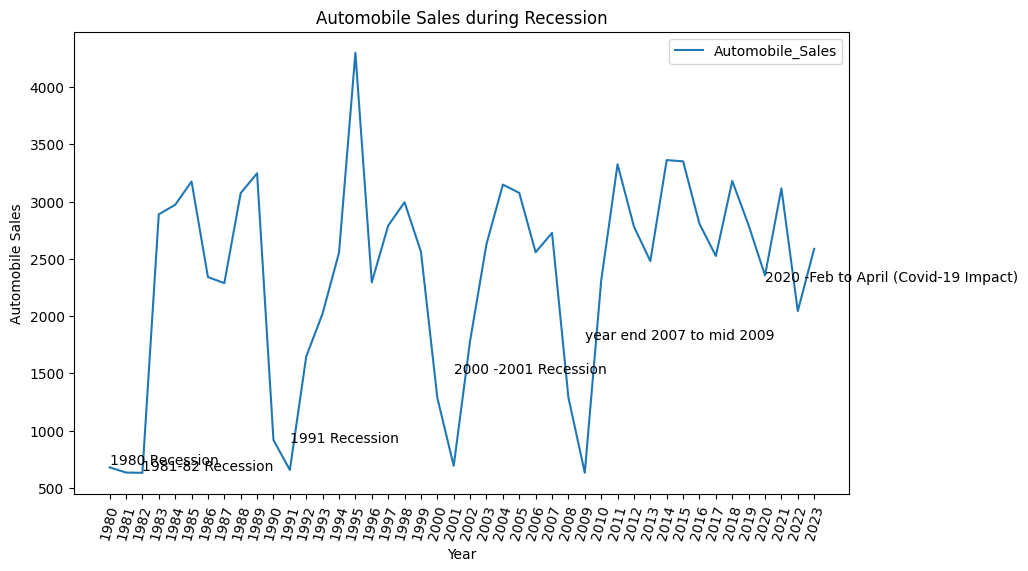

In [136]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991, 900, '1991 Recession')
plt.text(1980, 700, '1980 Recession')
plt.text(2001, 1500, '2000 -2001 Recession')
plt.text(2009, 1800, 'year end 2007 to mid 2009')
plt.text(2020, 2300, '2020 -Feb to April (Covid-19 Impact)')
plt.legend()
plt.savefig('automobile_sales_during_recession.png', dpi=300)
plt.show()

#### Plot different lines for categories of vehicle type and analyse the trend
#### Is there a noticeable difference in sales trends between different vehicle types during recession periods?

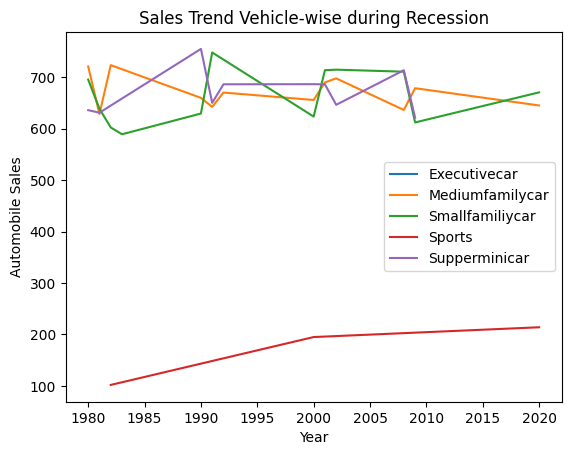

In [63]:
df_rec = df[df['Recession']==1]
df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.savefig('sales tren.png', dpi=300)
plt.show()

### Using the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


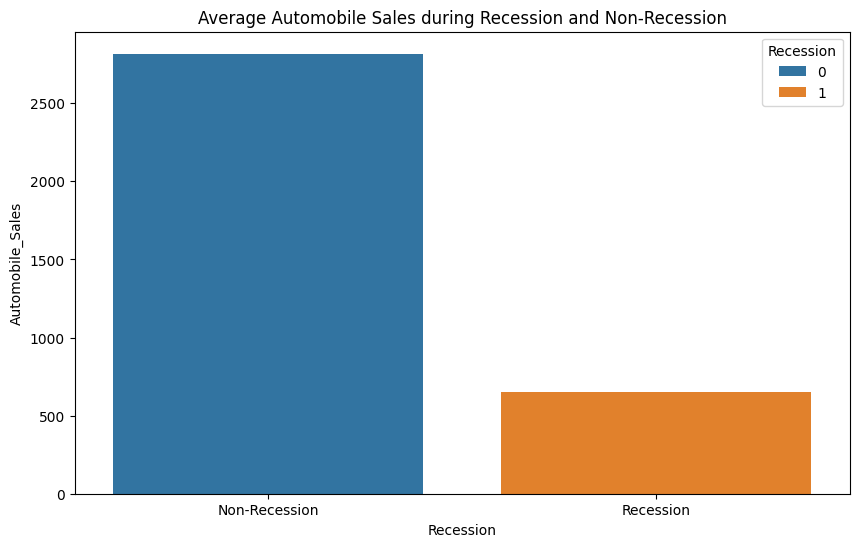

In [67]:
  new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Now lets compare the sales of different vehicle types during a recession and a non-recession period
<br>The functionality of **Seaborn Library** to create this visualization


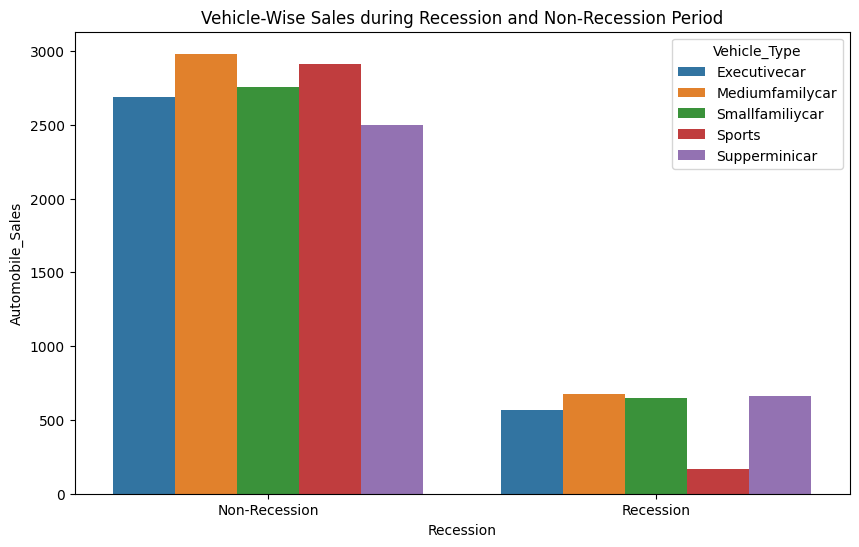

In [71]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.savefig('Bar_Chart.png')
plt.show()

### Using sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, we want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


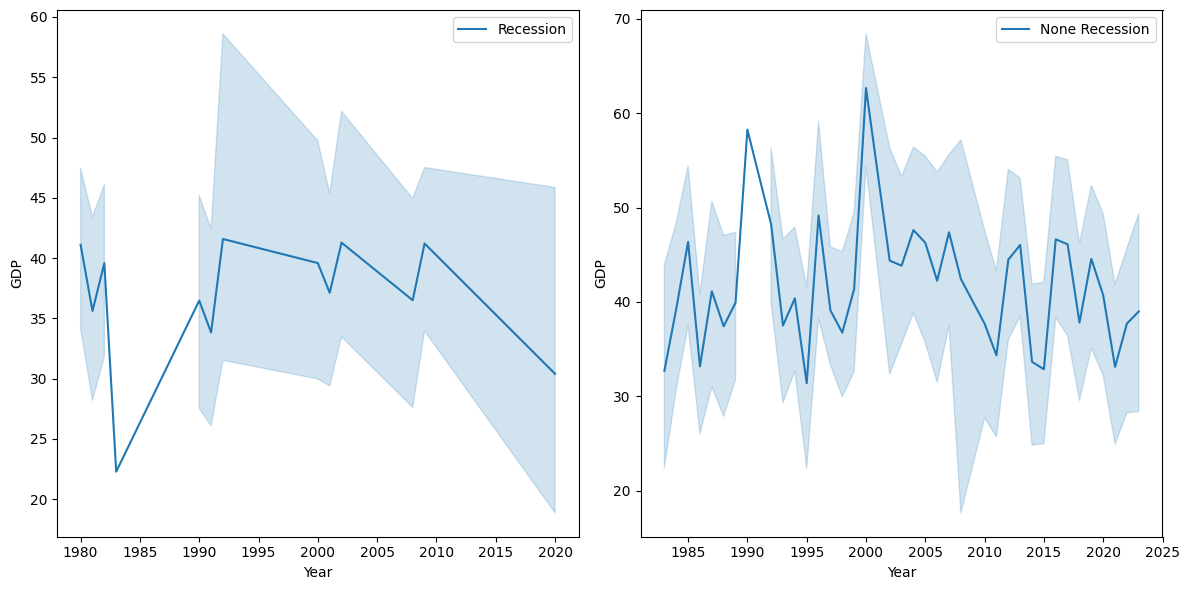

In [78]:

  #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
   #Using subplot()
plt.figure(figsize=(12, 6))
    
    #subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
    #subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='None Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
    
plt.tight_layout()
plt.show()

### Developing a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>



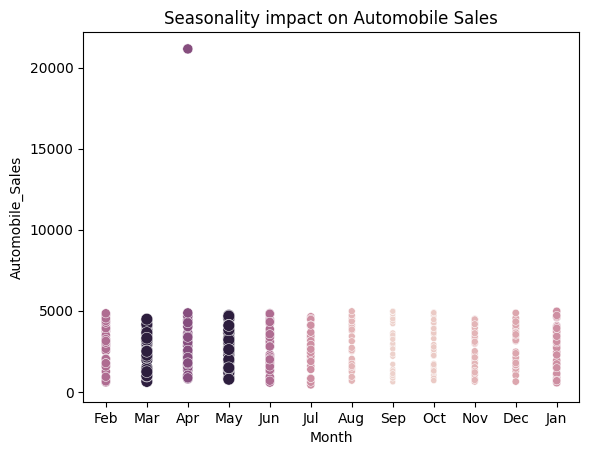

In [86]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', legend = False, size='Seasonality_Weight')
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

 ### Using the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 


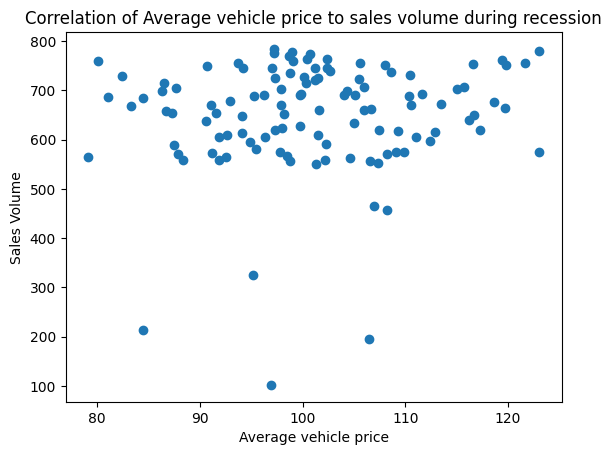

In [89]:
 #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average vehicle price')
plt.ylabel('Sales Volume')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


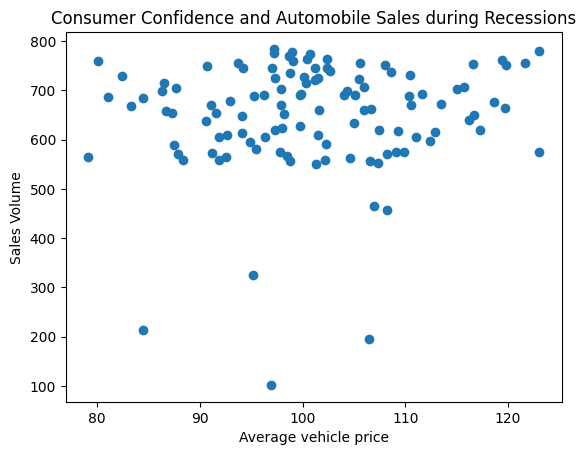

In [96]:
 #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average vehicle price')
plt.ylabel('Sales Volume')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.savefig('Scatter.png')
plt.show()

 ### Creating a pie chart to display the portion of advertising expenditure during recession and non-recession periods.
 <br>How did the advertising expenditure change during recession and non-recession periods? 


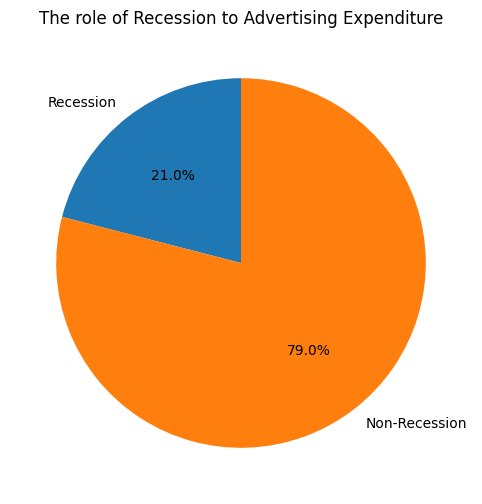

In [100]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('The role of Recession to Advertising Expenditure')

plt.show()


### Developing a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Let's observe the share of each vehicle type in total expenditure during recessions? 


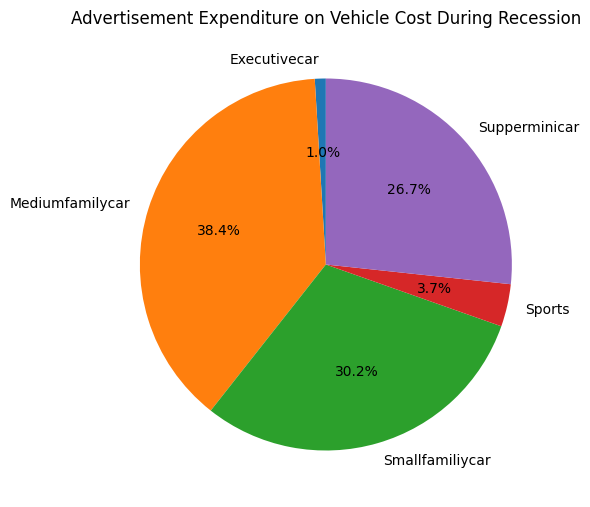

In [146]:
 # Filter the data 
Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(6, 10))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement Expenditure on Vehicle Cost During Recession')
plt.savefig('pie_2.png')
plt.show()


 ### Developing a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period


C:\Users\Alobwede\AppData\Local\Temp\ipykernel_24028\2534321213.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


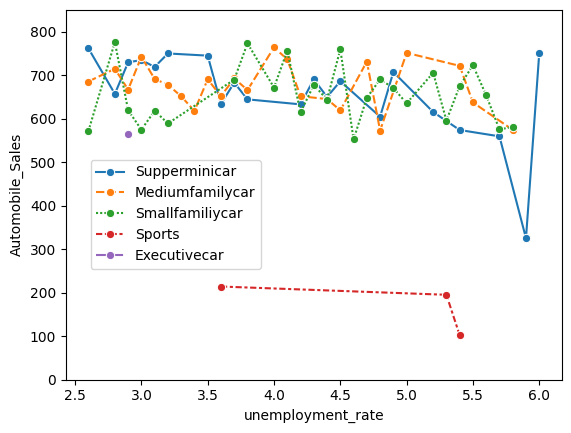

In [111]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.savefig('line_plot_3.png')

### Creating a map on the hightest sales region/offices of the company during recession period


In [121]:
import requests
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
response = requests.get(path)

# Save the JSON file locally 
with open('us-states.json', 'w') as file: file.write(response.text)

In [139]:
# Optional to see the content
#data = pd.read_json('us-states.json')
#data

In [125]:
 # Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

    # Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
map1